<a href="https://colab.research.google.com/github/Felixwkk/image_classification/blob/master/bottle_object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Downgrade to Tensorflow 1.15.2 to support GPU

In [0]:
!pip install tensorflow-gpu==1.15.2
import tensorflow as tf
print(tf.__version__)


     |████████████████████████████████| 411.0MB 43kB/s 
     |████████████████████████████████| 512kB 50.7MB/s 
     |████████████████████████████████| 3.8MB 54.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=cfffdde4a998256ae1d699c09ed76d64e3ce3b2270c9335472861c127f2652e0
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0

In [0]:
# setting up the environmet to use object detection API

In [0]:
!apt-get install -y -qq protobuf-compiler python-pil python-lxml

Selecting previously unselected package python-bs4.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

Download tensorflow models

In [0]:
! git clone --quiet https://github.com/tensorflow/models

Setting up the paths

In [0]:
import os
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.
! export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim
%set_env PYTHONPATH=/content/models/research/object_detection/
%set_env PYTHONPATH=/content/models/research/
os.environ['PYTHONPATH']=os.environ['PYTHONPATH']+':/content/models/research/slim'

/content/models/research
object_detection/protos/input_reader.proto: warning: Import object_detection/protos/image_resizer.proto but not used.
env: PYTHONPATH=/content/models/research/object_detection/
env: PYTHONPATH=/content/models/research/


In [0]:
import sys
sys.path.append('/content/models/research/slim')

Testing the paths and objection detection api is working

In [0]:
%set_env $PYTHONPATH =/content/models/research/slim
!python object_detection/builders/model_builder_test.py

env: $PYTHONPATH=/content/models/research/slim


In [0]:
import object_detection

Download images using google 
Need to setup the environment to support Python3

In [0]:
%cd /content
! git clone https://github.com/Joeclinton1/google-images-download.git
%cd /content/google-images-download
! wget https://files.pythonhosted.org/packages/ed/9c/9030520bf6ff0b4c98988448a93c04fcbd5b13cd9520074d8ed53569ccfe/selenium-3.141.0.tar.gz
!tar xf  /content/google-images-download/selenium-3.141.0.tar.gz
%cd /content/google-images-download/selenium-3.141.0
!python3 setup.py install

Download the jagermeister bottle image with 100 attempts.

In [0]:
%cd /content/google-images-download/google_images_download
! python google_images_download.py --keywords "jagermeister bottle" --limit 100 --format jpg

RESIZE image to fit into memory for training

In [0]:
from PIL import Image
import os

def rescale_images(directory, size):
    for img in os.listdir(directory):       
        im = Image.open(directory+img)
        im_resized = im.resize(size, Image.ANTIALIAS)
        im_resized.save(directory+img)

directory='/content/google-images-download/google_images_download/downloads/jagermeister bottle/'
size=[800, 600]
    
rescale_images(directory, size)

## **Creating the directories for object detection**

In [0]:
%cd /content
%mkdir /content/object_detection
%mkdir /content/object_detection/images
%mkdir /content/object_detection/images/train 
%mkdir /content/object_detection/images/test
import os
from shutil import copyfile
directory_image = '/content/google-images-download/google_images_download/downloads/jagermeister bottle/'
new_directory_imagetrain = '/content/object_detection/images/train/'
new_directory_imagetest = '/content/object_detection/images/test/'

/content


Move the images from the google folder to the object detection folder

In [0]:
# rename image files downloaded 
counter = 1
for x in os.listdir('/content/google-images-download/google_images_download/downloads/jagermeister bottle'):
  os.rename(directory_image+x, directory_image+str(counter)+'.jpg')
  counter +=1

Upload to Google Drive for storage and later use for creating XMLs using ImaLabel

In [0]:
# upload to google drive
google_drive_images = '/content/drive/My Drive/Colab Notebooks/object_tensor2.0/images/'
for x in os.listdir('/content/google-images-download/google_images_download/downloads/jagermeister bottle'):
  copyfile(directory_image+x, google_drive_images+x)

there are 69 images from 100 attempts downloaded. Split into training and testing sets

In [0]:
# separating to traing and testing sets
number_images = 69
counter = 1

for x in os.listdir('/content/google-images-download/google_images_download/downloads/jagermeister bottle/'):
  if counter < number_images*.8:
    copyfile(directory_image+x, new_directory_imagetrain+x)
  else:
    copyfile(directory_image+x, new_directory_imagetest+x)
  counter+=1

Creating the respective directories and copying files from google drive to colab

In [0]:
import os
from shutil import copyfile
# copy from google drive to colab
# separating to traing and testing sets
google_drive_imagestrain = '/content/drive/My Drive/Colab Notebooks/object_tensor2.0/images/'
google_drive_xmlstrain = '/content/drive/My Drive/Colab Notebooks/object_tensor2.0/xmls/'
google_drive_imagestest = '/content/drive/My Drive/Colab Notebooks/object_tensor2.0/images_test/'
google_drive_xmlstest = '/content/drive/My Drive/Colab Notebooks/object_tensor2.0/xmls_test/'
for x in os.listdir(google_drive_imagestrain):
    copyfile(google_drive_imagestrain+x, new_directory_imagetrain+x)
for x in os.listdir(google_drive_imagestest):
    copyfile(google_drive_imagestest+x, new_directory_imagetest+x)
for x in os.listdir(google_drive_xmlstrain):
    copyfile(google_drive_xmlstrain+x, new_directory_imagetrain+x)
for x in os.listdir(google_drive_xmlstest):
    copyfile(google_drive_xmlstest+x, new_directory_imagetest+x)


### **convert xml to csv**

In [0]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [0]:
%cd /content/object_detection/images
for folder in ['train', 'test']:
  image_path = '/content/object_detection/images/' +folder
  xml_df = xml_to_csv(image_path)
  xml_df.to_csv(('/content/object_detection/images/'+folder+'/'+folder+'_labels.csv'), index=None)
  print('Successfully converted xml to csv.')

/content/object_detection/images
Successfully converted xml to csv.
Successfully converted xml to csv.


In [0]:
%cd /content/models/research

/content/models/research


# **TFCREATE RECORD**

In [0]:
"""
Usage:
  # From tensorflow/models/
  # Create train data:
  python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record
  # Create test data:
  python generate_tfrecord.py --csv_input=images/test_labels.csv  --image_dir=images/test --output_path=test.record
"""
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict




# TO-DO replace this with label map
def class_text_to_int(row_label):
 if row_label == 'jagermeister bottle':
        return 1
 else:
        None


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example



writer = tf.python_io.TFRecordWriter('/content/object_detection/train.record')
path = '/content/object_detection/images/train'
examples = pd.read_csv(path+'/train_labels.csv')
grouped = split(examples, 'filename')
for group in grouped:
        tf_example = create_tf_example(group, path)
        writer.write(tf_example.SerializeToString())

writer.close()
output_path = '/content/object_detection'
print('Successfully created the TFRecords: {}'.format(output_path))


Successfully created the TFRecords: /content/object_detection


In [0]:
writer = tf.python_io.TFRecordWriter('/content/object_detection/test.record')
path = '/content/object_detection/images/test'
examples = pd.read_csv(path+'/test_labels.csv')
grouped = split(examples, 'filename')
for group in grouped:
        tf_example = create_tf_example(group, path)
        writer.write(tf_example.SerializeToString())

writer.close()
output_path = '/content/object_detection'
print('Successfully created the TFRecords: {}'.format(output_path))

Successfully created the TFRecords: /content/object_detection


In [0]:
#create a labelmap

In [0]:
f= open("/content/object_detection/label_map.pbtxt","w+")
f.write("item { \r\n id: 1 \r\n name: 'jagermeister bottle' }")
f.close() 

download the model for object detection. Other models are can be used

In [0]:
%cd /content/object_detection
%mkdir  faster_rcnn_inception_v2_coco_2018_01_28

!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
!tar -xvf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

/content/object_detection
--2020-05-16 06:08:58--  http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.193.128, 2607:f8b0:400c:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.193.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’

faster_rcnn_incepti 100%[===================>] 142.21M   128MB/s    in 1.1s    

2020-05-16 06:08:59 (128 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [149119618/149119618]

faster_rcnn_inception_v2_coco_2018_01_28/
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
faster_rcnn_inception_v2_coco_2018_01_28/checkpoint
faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_incep

In [0]:
! wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/samples/configs/faster_rcnn_inception_v2_pets.config

--2020-05-15 12:33:42--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/samples/configs/faster_rcnn_inception_v2_pets.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3686 (3.6K) [text/plain]
Saving to: ‘faster_rcnn_inception_v2_pets.config’

faster_rcnn_incepti 100%[===================>]   3.60K  --.-KB/s    in 0s      

2020-05-15 12:33:42 (65.4 MB/s) - ‘faster_rcnn_inception_v2_pets.config’ saved [3686/3686]



copy the config file from google drive to colab. Config file in google drive has been modified for this instanace requirements

In [0]:
copyfile('/content/drive/My Drive/Colab Notebooks/object_tensor2.0/faster_rcnn_inception_v2_pets.config','/content/object_detection/faster_rcnn_inception_v2_coco_2018_01_28/faster_rcnn_inception_v2_pets.config' )

'/content/object_detection/faster_rcnn_inception_v2_coco_2018_01_28/faster_rcnn_inception_v2_pets.config'

In [0]:
%cd /content/models/research
#from tensorflow.python.compiler.tensorrt import trt_convert as trt
%set_env =/content/models/research/slim;/content/models/research/object_detection/protos;/content/models/research/object_detection;pwd:pwd/slim
os.environ['PYTHONPATH']=os.environ['PYTHONPATH']+':/content/models/research/slim'
import sys
sys.path.append('/content/models/research/object_detection/')


/content/models/research
env: =/content/models/research/slim;/content/models/research/object_detection/protos;/content/models/research/object_detection;pwd:pwd/slim


Setting up the environment for training

In [0]:
! python object_detection/model_main.py --logtostderr --model_dir=training/ --pipeline_config_path=/content/object_detection/faster_rcnn_inception_v2_coco_2018_01_28/faster_rcnn_inception_v2_pets.config




W0516 06:09:09.043680 140190330787712 module_wrapper.py:139] From /content/models/research/object_detection/utils/config_util.py:137: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0516 06:09:09.046022 140190330787712 module_wrapper.py:139] From /content/models/research/object_detection/model_lib.py:685: The name tf.logging.warning is deprecated. Please use tf.compat.v1.logging.warning instead.

W0516 06:09:09.046151 140190330787712 model_lib.py:686] Forced number of epochs for all eval validations to be 1.

W0516 06:09:09.046268 140190330787712 module_wrapper.py:139] From /content/models/research/object_detection/utils/config_util.py:523: The name tf.logging.info is deprecated. Please use tf.compat.v1.logging.info instead.

INFO:tensorflow:Maybe overwriting train_steps: None
I0516 06:09:09.046346 140190330787712 config_util.py:523] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0516 06:09:09.046419 14019033

Checkpoint files are stored under training sub-directory in models/research

In [0]:
%tensorboard --logdir=training

Creating the model for detection 

In [0]:
!python object_detection/export_inference_graph.py --input_type image_tensor --pipeline_config_path /content/object_detection/faster_rcnn_inception_v2_coco_2018_01_28/faster_rcnn_inception_v2_pets.config --trained_checkpoint_prefix training/model.ckpt-6132 --output_directory inference_graph_2



W0516 06:20:57.157880 139909050791808 module_wrapper.py:139] From object_detection/export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0516 06:20:57.160520 139909050791808 module_wrapper.py:139] From /content/models/research/object_detection/meta_architectures/faster_rcnn_meta_arch.py:151: The name tf.AUTO_REUSE is deprecated. Please use tf.compat.v1.AUTO_REUSE instead.


W0516 06:20:57.163729 139909050791808 module_wrapper.py:139] From /content/models/research/object_detection/exporter.py:419: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0516 06:20:57.164009 139909050791808 module_wrapper.py:139] From /content/models/research/object_detection/exporter.py:138: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


W0516 06:20:57.201711 139909050791808 module_wrapper.py:139] From /content/models/research/object_detection/core/preprocessor.py:2739: The name

Running the detection with the image loaded in colab

In [0]:
# Import packages
%cd /content/object_detection
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import sys
# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
MODEL_NAME = '/content/models/research/inference_graph_2'
IMAGE_NAME = '/content/images.jpg'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'label_map.pbtxt')

# Path to image
PATH_TO_IMAGE = IMAGE_NAME #os.path.join(CWD_PATH,IMAGE_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 1

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

/content/object_detection


In [0]:
# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

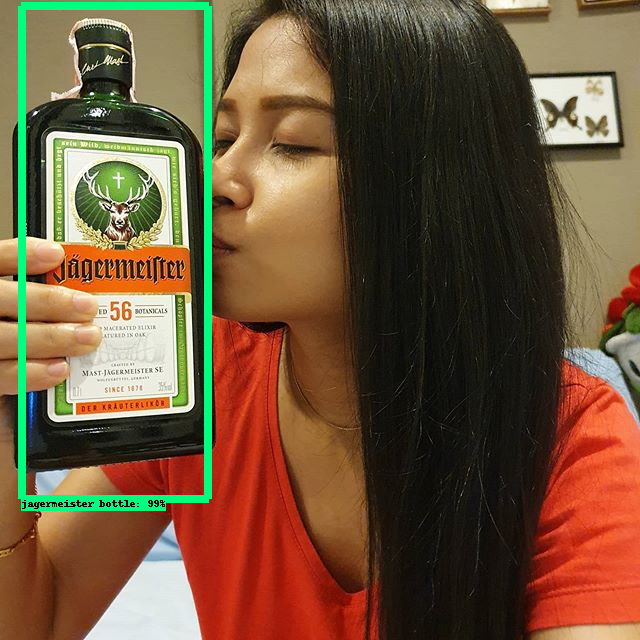

In [0]:
# Load image using OpenCV and
# expand image dimensions to have shape: [1, None, None, 3]
# i.e. a single-column array, where each item in the column has the pixel RGB value
image = cv2.imread(PATH_TO_IMAGE)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# Perform the actual detection by running the model with the image as input
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

# Draw the results of the detection (aka 'visulaize the results')

vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.9)

# All the results have been drawn on image. Now display the image.
cv2_imshow( image)

# Press any key to close the image
cv2.waitKey(0)

# Clean up
cv2.destroyAllWindows()

In [0]:
! pip install tensorflowjs

     |████████████████████████████████| 61kB 1.9MB/s 
     |████████████████████████████████| 92kB 4.6MB/s 
     |████████████████████████████████| 144.4MB 95kB/s 
     |████████████████████████████████| 256kB 50.9MB/s 
     |████████████████████████████████| 921kB 61.4MB/s 
     |████████████████████████████████| 3.0MB 26.3MB/s 
     |████████████████████████████████| 460kB 53.2MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=d727dece6e66aeb3a8ae80f143cd9c9d018b3b40381542bb0779ca0eaf802f81
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: tensorflow-gpu 1.15.2 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow-gpu 1.15.2 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.2.1 which is incompatible.
ERROR: tensorflow-gpu 1.15.2 has requirement tensorflow-estimator==1.15.1, bu

In [0]:
#!tensorflowjs_converter --input_format=tf_saved_model <input_dir> <output_dir>
%cd /content/models/research/object_detection
!tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --saved_model_tags=serve --output_format=tfjs_graph_model inference_graph/saved_model inference_graph/web_model

/content/models/research/object_detection
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/converter.py", line 671, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/converter.py", line 675, in main
    convert(argv[0].split(' '))
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/converter.py", line 618, in convert
    weight_shard_size_bytes=weight_shard_size_bytes)
  File "/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/tf_saved_model_conversion_v2.py", line 437, in convert_tf_saved_model
    model = load(saved_model_dir, saved_model_tags)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/saved_model/load.py", line 578, in load
    return load_internal(export_dir, tags)
  File "/usr/local/lib/python3.6/dist-packages/ten

In [0]:
saved_model_cli show --dir inference_graph/saved_model --tag_set serve --signature_def serving_default
#output will print something like this:
#detection_boxes
#detection_classes
#detection_features
#detection_multiclass_scores
#detection_scores
#num_detections
#raw_detection_boxes
#raw_detection_scores

faster_rcnn_inception_v2_coco_2018_01_28/        inference_graph/  train.record
faster_rcnn_inception_v2_coco_2018_01_28.tar.gz  label_map.pbtxt
images/                                          test.record
